In [2]:
results = {}
results['mushrooms'] = {
    'gpt4o': [[7.2, 6.2, 21.1, 24.85, 31.55, 2.6, 12.75, 25.75, 10.8, 28.75]],
 'gpt4o_mini': [[14.4,
   22.55,
   24.2,
   18.35,
   16.25,
   32.3,
   10.3,
   21.05,
   12.35,
   5.0]],
 'llama31_70b': [[6.15,
   19.3,
   12.75,
   25.35,
   12.75,
   18.9,
   15.2,
   33.2,
   39.8,
   26.75]],
 'llama31_8b': [[1.8, 10.15, 11.65, 4.2, 9.1, 17.3, 2.95, 10.2, 8.35, 2.6]],
 'MeltingPot': [
    9.515864759,
    9.772210377,
    9.853513703,
    8.705473098,
    8.989089184,
    7.784704519,
    42.44193548,
    10.36856801,
    9.565817449,
    8.978874068,
    8.389238845,
    7.167383513,
    7.480203237,
    12.31393855,
    11.18722784,
    11.66918489
]
 }

results['coins'] = {'gpt4o': [[54, 34, 42, 16, 48, 57, 28, 14, 27, 18]],
 'gpt4o_mini': [[36, 33, 37, 43, -9, 11, 50, 28, 47, 36]],
 'llama31_70b': [[32.0, 20.0, 26.0, 17.0, 47.0, 25.0, 26.0, 29.0, 30.0, 48.0]],
 'llama31_8b': [[27.0, 14.0, 17.0, 25.0, 32.0, 10.0, 65.0, 50.0, 32.0, 35.0]],
 'MeltingPot': [
    17.717273952400003,
    18.109239904800003,
    18.4141496616,
    31.3945238112,
    30.926524921600002,
    31.723534084,
    18.0107096796,
    18.136365434000002,
    18.3427264416,
    31.1817594836,
    30.681041754,
    30.485298012399998,
    17.1215693616,
    17.837263580400002,
    17.2995656108
    ]
 }

results['commonsharvest'] = {'gpt4o_mini': [[7.8, 9.4, 7.8, 8.2, 8.4, 9.2, 7.4, 10.8, 8.6, 8.4]],
 'llama31_70b': [[8.6, 8.0, 9.2, 9.8, 11.0, 7.0, 9.8, 8.8, 8.6, 8.0]],
 'llama31_8b': [[5.6, 6.6, 5.6, 8.4, 8.6, 9.8, 6.2, 5.8, 6.8, 8.4]],
 'MeltingPot': [
    10.28994709,
    10.1135376,
    10.39208633,
    10.76997539,
    10.7430223,
    11.55376261,
    10.67341772,
    10.00926984,
    9.814327657,
    10.11118922,
    6.675783972,
    6.410152838,
    7.794463668,
    10.746139,
    11.05280289
]
 }

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
def create_box_plot(ax, results, subcat_colors, norm_across_cats=False, **kwargs):
    """
    Creates a box plot with the results of the indicators
    The results are a dictionary with (categories) as keys and as values a dictionary with subcategories as keys and a list with the values for each simulation

    Parameters:
    results (dict): The results of the indicators
    subcat_colors (list): A list with the colors for each subcategory. Each element is a dictionary with the facecolor and the color
    norm_across_cats (bool): If True, the values will be normalized across categories
    **kwargs: Additional parameters for the plot. title and ylabel are supported
    """
    categories = list(results.keys())
    try:
        subcategories = list(results[categories[0]].keys())

    except:
        # If there are is an exception is because the data has no categories
        subcategories = categories
        categories = None
        

    if norm_across_cats and categories is not None:
        results = np.array(list(map(lambda x: list(x.values()), results.values()))) # 3 dimensions: categories, subcategories, simulations
        # Mask to avoid division by zero
        mask = results.sum(axis=0, keepdims=True) == 0
        results = results/(results.sum(axis=0, keepdims=True)+mask)

    if categories is None:
        positions = np.arange(len(subcategories))+1
    else:
        positions = np.arange(len(categories)*len(subcategories))+1
    if kwargs['scale_xticks']:
        positions = positions*kwargs['scale_xticks']
    if kwargs['xticks_translation']:
        positions += kwargs['xticks_translation']

    # fig, ax = plt.subplots(**kwargs.get('subplots_kwargs',{}))
    for s, subcategory in enumerate(subcategories):
        boxprops = subcat_colors[s].copy()
        if categories is not None:
            if norm_across_cats:
                data = [results[c][s] for c in range(len(categories))]
            else:
                data = [results[c][subcategory] for c in categories]
        else:
            # data = results[s]
            data = results[subcategory]
        
        ax.boxplot(data, positions=positions[s::len(subcategories)], patch_artist=True, boxprops=boxprops, showmeans=True)

    if categories is not None:
        ax.set_xticks(positions[::len(subcategories)], kwargs['xticks_names'] if kwargs['xticks_names'] else categories, rotation=90)
    else:
        ax.set_xticks(positions, kwargs['xticks_names'] if kwargs['xticks_names'] else subcategories, rotation=90)

    if 'title' in kwargs:
        ax.set_title(kwargs['title'])
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])

    if categories is not None:
        legend_elements = [Patch(facecolor=subcat_colors[i]['facecolor'], edgecolor=subcat_colors[i]['color'], \
                                label=subcategory) for i, subcategory in enumerate(subcategories)]
        plt.legend(handles=legend_elements, loc='upper right')

    return ax

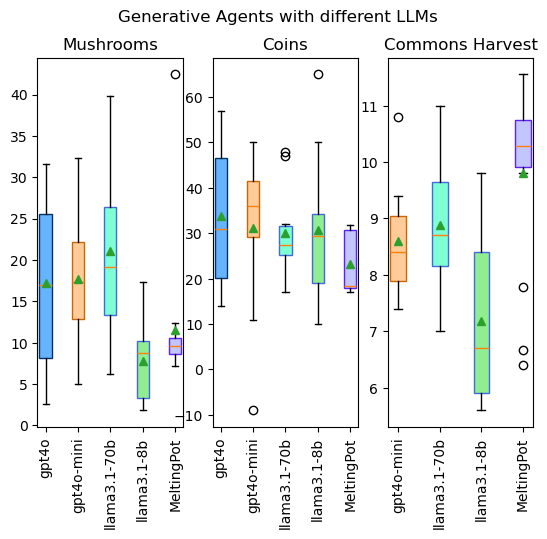

In [57]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Generative Agents with different LLMs')
substrates_names = {
    'mushrooms': 'Mushrooms',
    'coins': 'Coins',
    'commonsharvest': 'Commons Harvest'
}
for substrate, ax_ in zip(results, axs):
    subcat_colors = [
        {"facecolor": "#66b3ff", "color": "#003366"},   # GPT4o (CoTAgents y GenAgents)
        {"facecolor": "#ffcc99", "color": "#cc6600"},  # GPT4o-mini (CoTAgents y GenAgents)
        {'facecolor': 'aquamarine', 'color': 'royalblue'}, # Llama 70b
        {'facecolor': 'lightgreen', 'color': 'royalblue'}, # Llama 8b
        {'facecolor': 'xkcd:light periwinkle', 'color': 'xkcd:purplish blue', 'alpha': 1}, # MeltingPot
    ]
    title = substrates_names[substrate]
    n = len(results[substrate])
    ax = create_box_plot(ax_, results[substrate], subcat_colors[-n:], title=title, scale_xticks=0.4, 
                        xticks_translation=-0.3,
                        xticks_names=['gpt4o', 'gpt4o-mini', 'llama3.1-70b', 'llama3.1-8b', 'MeltingPot'][-n:]
                        )
    ax_.set_xlim(0, n*0.4-0.2)
plt.show()